<a href="https://colab.research.google.com/github/WojtekSza/Data_engineer_entry_task/blob/main/Data_engineer_entry_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Engineer Entry Task**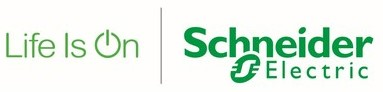

In [5]:
import pandas as pd
import requests
import gzip
import json
import numpy as np

# SCRIPT TO DOWNLOAD DATA:

In [31]:
f = open("data_ingestion.txt", "w")
f.close()

In [32]:
for i in range(1,29):
    for ii in range (0,24): 
      if i<10:
        url="https://data.gharchive.org/2015-01-0"+str(i)+'-'+str(ii)+".json.gz"
        response = requests.get(url)
        data=gzip.decompress(response.content)
        data=data.decode("utf-8")
        #data=data.split('\n')
        #data.pop()
        #all_data.extend(data)
        with open("data_ingestion.txt",'a',encoding = 'utf-8') as f:
            f.write(data)
        print('day :'+str(i)+' hour :'+str(ii))
      else:
        url="https://data.gharchive.org/2015-01-"+str(i)+'-'+str(ii)+".json.gz"
        response = requests.get(url)
        data=gzip.decompress(response.content)
        data=data.decode("utf-8")
        #data=data.split('\n')
        #data.pop()
        #all_data.extend(data)
        with open("data_ingestion.txt",'a',encoding = 'utf-8') as f:
            f.write(data)        
        print('day :'+str(i)+' hour :'+str(ii))

day :1 hour :0
day :1 hour :1
day :1 hour :2
day :1 hour :3
day :1 hour :4
day :1 hour :5
day :1 hour :6
day :1 hour :7
day :1 hour :8
day :1 hour :9
day :1 hour :10
day :1 hour :11
day :1 hour :12
day :1 hour :13
day :1 hour :14
day :1 hour :15
day :1 hour :16
day :1 hour :17
day :1 hour :18
day :1 hour :19
day :1 hour :20
day :1 hour :21
day :1 hour :22
day :1 hour :23
day :2 hour :0
day :2 hour :1
day :2 hour :2
day :2 hour :3
day :2 hour :4
day :2 hour :5
day :2 hour :6
day :2 hour :7
day :2 hour :8
day :2 hour :9
day :2 hour :10
day :2 hour :11
day :2 hour :12
day :2 hour :13
day :2 hour :14
day :2 hour :15
day :2 hour :16
day :2 hour :17
day :2 hour :18
day :2 hour :19
day :2 hour :20
day :2 hour :21
day :2 hour :22
day :2 hour :23
day :3 hour :0
day :3 hour :1
day :3 hour :2
day :3 hour :3
day :3 hour :4
day :3 hour :5
day :3 hour :6
day :3 hour :7
day :3 hour :8
day :3 hour :9
day :3 hour :10
day :3 hour :11
day :3 hour :12
day :3 hour :13
day :3 hour :14
day :3 hour :15
day :3

In [7]:
database=[]
with open("data_ingestion.txt") as fileobject:
    for line in fileobject:
      data_json = json.loads(line)
      database.append([data_json['created_at'],data_json['repo']['id'],data_json['repo']['name'],data_json['actor']['id'],data_json['actor']['login'],data_json['type']])

In [8]:
dataframe=pd.DataFrame(database,columns=['created_at','repo_id','repo','user_id','user','type'])
dataframe['created_at']=pd.to_datetime(dataframe['created_at']).dt.date
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12605632 entries, 0 to 12605631
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   created_at  object
 1   repo_id     int64 
 2   repo        object
 3   user_id     int64 
 4   user        object
 5   type        object
dtypes: int64(2), object(4)
memory usage: 577.0+ MB


# REPOSITORY AGGREGATION:

In [9]:
dataframe_repo=dataframe.copy()

In [10]:
dataframe_repo['type'].unique()

array(['PushEvent', 'CreateEvent', 'IssueCommentEvent',
       'PullRequestReviewCommentEvent', 'PullRequestEvent', 'ForkEvent',
       'WatchEvent', 'DeleteEvent', 'IssuesEvent', 'CommitCommentEvent',
       'GollumEvent', 'ReleaseEvent', 'MemberEvent', 'PublicEvent'],
      dtype=object)

In [11]:
dataframe_repo=dataframe_repo[(dataframe_repo['type']=='CreateEvent') | (dataframe_repo['type']=='ForkEvent') | (dataframe_repo['type']=='IssuesEvent') | (dataframe_repo['type']=='PullRequestEvent')]

In [12]:
dataframe_repo_pivot=dataframe_repo.pivot_table(index=['created_at','repo_id','repo'], columns='type', values='user',aggfunc='count')

In [14]:
dataframe_repo_pivot.to_csv('results_repo_aggregation.csv')

# USER AGGREGATION:

In [16]:
dataframe_users=dataframe.copy()

In [19]:
dataframe_users=dataframe_users[(dataframe_users['type']=='CreateEvent') | (dataframe_users['type']=='IssuesEvent') | (dataframe_users['type']=='PullRequestEvent')]

In [21]:
dataframe_users_pivot=dataframe_users.pivot_table(index=['created_at','user_id','user'], columns='type', values='repo',aggfunc='count')

In [23]:
dataframe_users_pivot.to_csv('results_user_aggregation.csv')